In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!rm -rf /content/drive


In [ ]:
!pip install opencv-python shapely tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.6 MB/s eta 0:00:00


In [ ]:
!pip install pillow pillow-heif


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.6 MB/s eta 0:00:00


In [ ]:
import os
from PIL import Image
import pillow_heif

src_dir = "/content/drive/MyDrive/annotation/data/"
dst_dir = "/content/drive/MyDrive/annotati/data/jpg_images"
os.makedirs(dst_dir, exist_ok=True)

for file in os.listdir(src_dir):
    if file.lower().endswith(".heic"):
        heif_file = pillow_heif.read_heif(os.path.join(src_dir, file))
        img = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data
        )
        out_name = os.path.splitext(file)[0] + ".jpg"
        img.save(os.path.join(dst_dir, out_name), "JPEG")
        print(f"Converted: {file} → {out_name}")


ModuleNotFoundError: No module named 'pillow_heif'

In [ ]:
import json, cv2, os
import numpy as np
from tqdm import tqdm

json_path = "/content/drive/MyDrive/annotati/labels_my-project-name_2025-09-18-04-55-28.json"
img_dir   = "/content/drive/MyDrive/annotati/data"
mask_dir  = "/content/drive/MyDrive/annotati/masks"
os.makedirs(mask_dir, exist_ok=True)

with open(json_path) as f:
    data = json.load(f)

for img_name, v in tqdm(data.items()):
    # اقرأ مقاس الصورة من الفايل نفسه
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue
    h, w = img.shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)

    regions = v.get("regions", [])
    # لو regions Dict → ناخد القيم
    if isinstance(regions, dict):
        regions = regions.values()

    for r in regions:
        print(type(regions), img_name)
        shape = r["shape_attributes"]
        xs, ys = shape["all_points_x"], shape["all_points_y"]
        pts = np.array(list(zip(xs, ys)), dtype=np.int32)
        cv2.fillPoly(mask, [pts], 255)
    cv2.imwrite(os.path.join(mask_dir, img_name.replace('.jpg','.png')), mask)


ModuleNotFoundError: No module named 'cv2'

In [ ]:
!pip install torch torchvision albumentations segmentation-models-pytorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
import glob, shutil, random, os

base_dir = "/content/drive/MyDrive/annotati"
split_dir = "/content/drive/MyDrive/annotati_split"
os.makedirs(split_dir, exist_ok=True)

for s in ["train","val","test"]:
    os.makedirs(f"{split_dir}/{s}/images", exist_ok=True)
    os.makedirs(f"{split_dir}/{s}/masks", exist_ok=True)

images = glob.glob(f"{base_dir}/data/*.*")
random.shuffle(images)

n = len(images)
train_end = int(0.7*n)
val_end   = int(0.9*n)

splits = {
    "train": images[:train_end],
    "val"  : images[train_end:val_end],
    "test" : images[val_end:]
}

for s, imgs in splits.items():
    for img_path in imgs:
        name = os.path.basename(img_path)
        name_no_ext = os.path.splitext(name)[0]
        mask_path   = f"{base_dir}/masks/{name_no_ext}.png"
        if os.path.exists(mask_path):           # ✅ تأكد الماسك موجود
            shutil.copy(img_path, f"{split_dir}/{s}/images/{name}")
            shutil.copy(mask_path, f"{split_dir}/{s}/masks/{name_no_ext}.png")
        else:
            print("⚠️ no mask for:", name)
for s in ["train","val","test"]:
    imgs = glob.glob(f"{split_dir}/{s}/images/*.*")
    msks = glob.glob(f"{split_dir}/{s}/masks/*.*")
    print(f"{s.upper()} => {len(imgs)} images | {len(msks)} masks")


TRAIN => 0 images | 0 masks
VAL => 0 images | 0 masks
TEST => 0 images | 0 masks


In [ ]:
!ls -R /content/drive/MyDrive | head -n 50


/content/drive/MyDrive:
annotati
annotati_split

/content/drive/MyDrive/annotati:
masks

/content/drive/MyDrive/annotati/masks:

/content/drive/MyDrive/annotati_split:
test
train
val

/content/drive/MyDrive/annotati_split/test:
images
masks

/content/drive/MyDrive/annotati_split/test/images:

/content/drive/MyDrive/annotati_split/test/masks:

/content/drive/MyDrive/annotati_split/train:
images
masks

/content/drive/MyDrive/annotati_split/train/images:

/content/drive/MyDrive/annotati_split/train/masks:

/content/drive/MyDrive/annotati_split/val:
images
masks

/content/drive/MyDrive/annotati_split/val/images:

/content/drive/MyDrive/annotati_split/val/masks:


In [ ]:
print(f"{split_dir}/train/images")
print(f"{split_dir}/train/masks")


/content/drive/MyDrive/annotati_split/train/images
/content/drive/MyDrive/annotati_split/train/masks


In [ ]:
import glob
print("Train images:", len(glob.glob("/content/drive/MyDrive/annotati_split/train/images/*.*")))
print("Val images:",   len(glob.glob("/content/drive/MyDrive/annotati_split/val/images/*.*")))
print("Test images:",  len(glob.glob("/content/drive/MyDrive/annotati_split/test/images/*.*")))


Train images: 26
Val images: 8
Test images: 4


In [ ]:

!pip install albumentations==1.4.0 --quiet
!pip install segmentation-models-pytorch --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 27.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Epoch 1/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


Epoch 1: Train 1.1269 | Val 15.4473
✅ Saved new best model (Val Loss 15.4473)


Epoch 2/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


Epoch 2: Train 0.9706 | Val 55.4953


Epoch 3/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 3: Train 0.8567 | Val 14.6203
✅ Saved new best model (Val Loss 14.6203)


Epoch 4/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


Epoch 4: Train 0.7295 | Val 1.9715
✅ Saved new best model (Val Loss 1.9715)


Epoch 5/15 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


Epoch 5: Train 0.7192 | Val 0.8837
✅ Saved new best model (Val Loss 0.8837)


Epoch 6/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


Epoch 6: Train 0.5812 | Val 0.9999


Epoch 7/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Epoch 7: Train 0.5874 | Val 1.0184


Epoch 8/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 8: Train 0.4508 | Val 0.4541
✅ Saved new best model (Val Loss 0.4541)


Epoch 9/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


Epoch 9: Train 0.4297 | Val 0.5180


Epoch 10/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


Epoch 10: Train 0.3953 | Val 0.4194
✅ Saved new best model (Val Loss 0.4194)


Epoch 11/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


Epoch 11: Train 0.3941 | Val 0.4515


Epoch 12/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 12: Train 0.4938 | Val 0.7251


Epoch 13/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 13: Train 0.3553 | Val 0.6705


Epoch 14/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


Epoch 14: Train 0.4161 | Val 0.5046


Epoch 15/15 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 15: Train 0.3451 | Val 0.6000


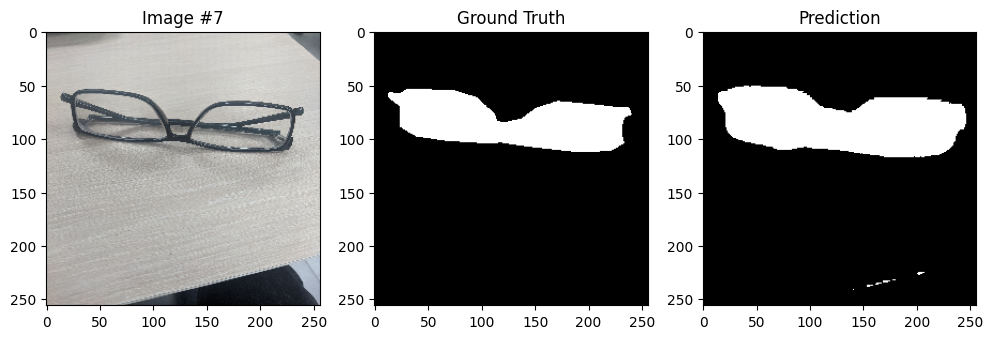

In [ ]:
import os, cv2, random, numpy as np, torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp
from tqdm import tqdm
import matplotlib.pyplot as plt

# =======================
# Dataset
# =======================
class SegDataset(Dataset):
    def __init__(self, img_dir, mask_dir, aug=None):
        self.imgs = sorted(os.listdir(img_dir))
        self.img_dir, self.mask_dir = img_dir, mask_dir
        self.aug = aug
    def __len__(self): return len(self.imgs)
    def __getitem__(self, i):
        img_path  = os.path.join(self.img_dir, self.imgs[i])
        mask_path = os.path.join(self.mask_dir, self.imgs[i].replace('.jpg','.png'))
        image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        mask  = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask  = (mask>127).astype(np.float32)
        if self.aug:
            auged = self.aug(image=image, mask=mask)
            image, mask = auged["image"], auged["mask"].unsqueeze(0)
        return image.float()/255.0, mask.float()

# =======================
# Augmentation
# =======================
train_tf = A.Compose([
    A.Resize(256,256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.3),
    A.Affine(scale=(0.9,1.1), translate_percent=(0.05,0.05),
             rotate=(-20,20), p=0.5),   # بديل لـ ShiftScaleRotate
    A.GaussianBlur(p=0.2),
    ToTensorV2()
])
val_tf = A.Compose([
    A.Resize(256,256),
    ToTensorV2()
])

# =======================
# Data Loaders
# =======================
split_dir = "/content/drive/MyDrive/annotati_split"   # عدّل لو مختلف
train_ds = SegDataset(f"{split_dir}/train/images", f"{split_dir}/train/masks", train_tf)
val_ds   = SegDataset(f"{split_dir}/val/images",   f"{split_dir}/val/masks",   val_tf)

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=2)
val_dl   = DataLoader(val_ds,   batch_size=4, shuffle=False, num_workers=2)

# =======================
# U-Net Model (ResNet34 encoder)
# =======================
device = "cuda" if torch.cuda.is_available() else "cpu"
model = smp.Unet(
    encoder_name="resnet34",     # 🔹 U-Net + ResNet34
    encoder_weights="imagenet",
    classes=1,
    activation=None
).to(device)

# Loss + Optimizer
dice_loss = smp.losses.DiceLoss(mode='binary')
bce_loss  = torch.nn.BCEWithLogitsLoss()

def loss_fn(pred, target):
    return dice_loss(pred, target) + bce_loss(pred, target)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)

# =======================
# Training Loop
# =======================
best_loss = 1e9
EPOCHS =15

for epoch in range(EPOCHS):
    # ----- Train -----
    model.train()
    train_loss = 0.0
    for x, y in tqdm(train_dl, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dl)

    # ----- Validation -----
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x, y in tqdm(val_dl, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            val_loss += loss_fn(pred, y).item()
    val_loss /= len(val_dl)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: Train {train_loss:.4f} | Val {val_loss:.4f}")

    # ----- Save Best -----
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/annotati/best_unet_resnet34.pth")
        print(f"✅ Saved new best model (Val Loss {best_loss:.4f})")

# =======================
# تجربة صورة عشوائية من الـ Val
# =======================
model.eval()
idx = random.randint(0, len(val_ds)-1)
img, mask = val_ds[idx]
x = img.unsqueeze(0).to(device)

with torch.no_grad():
    pred = torch.sigmoid(model(x)).cpu().numpy()[0,0]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img.permute(1,2,0)); plt.title(f'Image #{idx}')
plt.subplot(1,3,2); plt.imshow(mask[0], cmap='gray'); plt.title('Ground Truth')
plt.subplot(1,3,3); plt.imshow(pred>0.5, cmap='gray'); plt.title('Prediction')
plt.show()


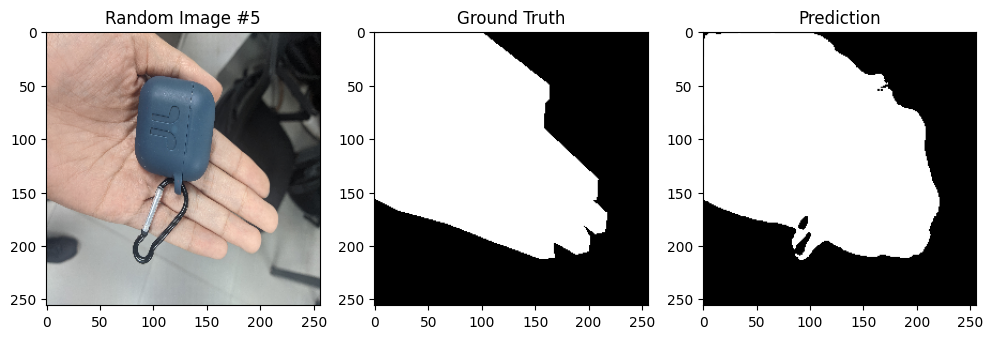

In [ ]:
import random, torch
import matplotlib.pyplot as plt

model.eval()

# ✅ اختار اندكس عشوائي من الـ dataset
idx = random.randint(0, len(val_ds)-1)

# هات الصورة و الماسك
img, mask = val_ds[idx]     # img: [C,H,W], mask: [1,H,W]
x = img.unsqueeze(0).to(device)  # أضف بعد للباتش

# ✅ اعمل Prediction
with torch.no_grad():
    pred = torch.sigmoid(model(x)).cpu().numpy()[0,0]

# ✅ اعرض النتيجة
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img.permute(1,2,0))
plt.title(f'Random Image #{idx}')
plt.subplot(1,3,2); plt.imshow(mask[0], cmap='gray')
plt.title('Ground Truth')
plt.subplot(1,3,3); plt.imshow(pred>0.5, cmap='gray')
plt.title('Prediction')
plt.show()


In [ ]:
import os, glob, random, math, time
import cv2, json, numpy as np
from tqdm import tqdm
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

In [ ]:
# ------------- user paths / params -------------
split_dir = "/content/drive/MyDrive/annotati_split"   # عدّل لو لازم
S = 7      # grid
B = 2      # boxes per cell
C = 1      # classes
img_size = 448   # YOLOv1 uses 448x448
batch_size = 8
epochs = 10
lr = 1e-4
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# ------------- user paths / params -------------
split_dir = "/content/drive/MyDrive/annotati_split"   # عدّل لو لازم
S = 7      # grid
B = 2      # boxes per cell
C = 1      # classes
img_size = 448   # YOLOv1 uses 448x448
batch_size = 8
epochs = 10
lr = 1e-4
device = "cuda" if torch.cuda.is_available() else "cpu"
# -----------------------------------------------

os.makedirs("/content/yolo_labels/train", exist_ok=True)
os.makedirs("/content/yolo_labels/val", exist_ok=True)

def masks_to_bboxes(mask_path):
    """اقرأ ماسك (ثنائي) وارجع قائمة bboxes (x_min,y_min,x_max,y_max) بالبيكسل."""
    m = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if m is None:
        return []
    # تأكد ثنائي
    _, m = cv2.threshold(m, 127, 255, cv2.THRESH_BINARY)
    num_labels, labels = cv2.connectedComponents(m)
    boxes = []
    for lab in range(1, num_labels):
        ys, xs = np.where(labels == lab)
        if ys.size == 0: continue
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()
        # تجاهل very small
        if (x_max - x_min) < 2 or (y_max - y_min) < 2: continue
        boxes.append([x_min, y_min, x_max, y_max])
    return boxes


In [ ]:
# ===== create YOLO label files (.txt same name as image) for train/val
def create_yolo_labels(split="train"):
    img_dir = os.path.join(split_dir, split, "images")
    mask_dir = os.path.join(split_dir, split, "masks")
    out_dir = f"/content/yolo_labels/{split}"
    os.makedirs(out_dir, exist_ok=True)
    imgs = sorted(glob.glob(os.path.join(img_dir, "*.*")))
    for p in tqdm(imgs, desc=f"labels {split}"):
        name = os.path.basename(p)
        name_noext = os.path.splitext(name)[0]
        maskp = os.path.join(mask_dir, name_noext + ".png")
        if not os.path.exists(maskp):
            # لا ماسك -> empty label
            open(os.path.join(out_dir, name_noext + ".txt"), "w").close()
            continue
        boxes = masks_to_bboxes(maskp)
        img = cv2.imread(p)
        h, w = img.shape[:2]
        lines = []
        for box in boxes:
            x1,y1,x2,y2 = box
            cx = (x1 + x2) / 2.0 / w
            cy = (y1 + y2) / 2.0 / h
            bw = (x2 - x1) / w
            bh = (y2 - y1) / h
            # YOLOv1 expects class x_center y_center w h (normalized) per object
            # since we will convert to grid encoding later, save normalized boxes here
            lines.append(f"0 {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")
        with open(os.path.join(out_dir, name_noext + ".txt"), "w") as f:
            f.write("\n".join(lines))

create_yolo_labels("train")
create_yolo_labels("val")


labels val: 100%|██████████| 8/8 [00:01<00:00,  5.42it/s]


In [ ]:
!ls /content/drive/MyDrive/annotati_split/train/images | head


IMG_20250912_121742.jpg
IMG_2036.jpg
IMG_2038.jpg
IMG_2042.jpg
IMG_2043.jpg
IMG_2044.jpg
IMG_2045.jpg
IMG_2047.jpg
IMG_2048.jpg
IMG_2050.jpg


In [ ]:
# ========== Dataset that returns SxSx(5B + C) target tensor ==========
class YOLODataset(Dataset):
    def __init__(self, split="train", img_size=448, S=7, B=2, C=1, transforms=None):
        self.img_dir = os.path.join(split_dir, split, "images")
        self.label_dir = f"/content/yolo_labels/{split}"
        self.imgs = sorted([os.path.basename(p) for p in glob.glob(self.img_dir + "/*.*")])
        self.S, self.B, self.C = S,B,C
        self.img_size = img_size
        self.transforms = transforms

    def __len__(self): return len(self.imgs)

    def __getitem__(self, idx):
        name = self.imgs[idx]
        name_noext = os.path.splitext(name)[0]
        img_path = os.path.join(self.img_dir, name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        H0, W0 = img.shape[:2]
        # resize to fixed img_size
        img = cv2.resize(img, (self.img_size, self.img_size))
        img = img.astype(np.float32) / 255.0
        img = np.transpose(img, (2,0,1))
        # read label file
        label_path = os.path.join(self.label_dir, name_noext + ".txt")
        target = np.zeros((self.S, self.S, self.C + 5*self.B), dtype=np.float32)
        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f.read().strip().splitlines():
                    if not line: continue
                    cls, cx, cy, bw, bh = line.split()
                    cls = int(cls)
                    cx,cy,bw,bh = map(float, (cx,cy,bw,bh))
                    # convert to grid cell coordinates
                    cell_size = 1.0 / self.S
                    gx = cx * self.S
                    gy = cy * self.S
                    cell_x = int(gx)
                    cell_y = int(gy)
                    # relative x,y inside cell (0..1)
                    rel_x = gx - cell_x
                    rel_y = gy - cell_y
                    # assign to the cell if within range
                    if cell_x < 0 or cell_x >= self.S or cell_y < 0 or cell_y >= self.S:
                        continue
                    # if cell already has object (use first) - this is simplified
                    if target[cell_y, cell_x, self.C] == 1:
                        # already occupied; skip or you could handle multiple objects per cell
                        continue
                    # set class one-hot (single class -> set index 0)
                    target[cell_y, cell_x, cls] = 1.0
                    # set B boxes: (conf, x, y, w, h) for each box slot
                    for b in range(self.B):
                        offset = self.C + b*5
                        target[cell_y, cell_x, offset + 0] = 1.0   # confidence = 1 for ground truth
                        target[cell_y, cell_x, offset + 1] = rel_x
                        target[cell_y, cell_x, offset + 2] = rel_y
                        target[cell_y, cell_x, offset + 3] = bw
                        target[cell_y, cell_x, offset + 4] = bh
        return torch.tensor(img, dtype=torch.float32), torch.tensor(target, dtype=torch.float32), name_noext


In [ ]:
# ====== simple YOLOv1-like model (smaller) ======
def conv_block(in_c, out_c, k=3, s=1, p=1):
    return nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=k, stride=s, padding=p),
        nn.BatchNorm2d(out_c),
        nn.LeakyReLU(0.1)
    )

class TinyYOLOv1(nn.Module):
    def __init__(self, S=7, B=2, C=1):
        super().__init__()
        self.S, self.B, self.C = S,B,C
        # small conv backbone
        self.features = nn.Sequential(
            conv_block(3, 32, 3,1,1),
            nn.MaxPool2d(2),
            conv_block(32,64,3,1,1),
            nn.MaxPool2d(2),
            conv_block(64,128,3,1,1),
            conv_block(128,64,1,1,0),
            conv_block(64,128,3,1,1),
            nn.MaxPool2d(2),
            conv_block(128,256,3,1,1),
            conv_block(256,128,1,1,0),
            conv_block(128,256,3,1,1),
            nn.MaxPool2d(2),
            conv_block(256,512,3,1,1),
            conv_block(512,256,1,1,0),
            conv_block(256,512,3,1,1),
            conv_block(512,256,1,1,0),
            conv_block(256,512,3,1,1),
            nn.MaxPool2d(2),
            conv_block(512,1024,3,1,1),
            conv_block(1024,512,1,1,0),
            conv_block(512,1024,3,1,1),
            conv_block(1024,512,1,1,0),
            conv_block(512,1024,3,1,1),
        )
        # final FC to S*S*(C + 5B)
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024 * (img_size // 32) * (img_size // 32), 4096), # this is large; okay for small images
            nn.LeakyReLU(0.1),
            nn.Linear(4096, S*S*(C + 5*B))
        )
    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        x = x.view(-1, self.S, self.S, self.C + 5*self.B)
        return x

In [ ]:
# ===== loss (simplified MSE loss similar to YOLOv1) =====
class YOLOLoss(nn.Module):
    def __init__(self, S=7, B=2, C=1, lambda_coord=5.0, lambda_noobj=0.5):
        super().__init__()
        self.S, self.B, self.C = S,B,C
        self.mse = nn.MSELoss(reduction='sum')
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj

    def forward(self, preds, target):
        # preds, target: (N, S, S, C + 5B)
        N = preds.size(0)
        loss = 0.0
        # convert to components
        # class loss
        pred_cls = preds[..., :self.C]
        true_cls = target[..., :self.C]
        loss += self.mse(pred_cls, true_cls)  # sum

        # box losses
        for b in range(self.B):
            p_conf = preds[..., self.C + b*5 + 0]
            p_x = preds[..., self.C + b*5 + 1]
            p_y = preds[..., self.C + b*5 + 2]
            p_w = preds[..., self.C + b*5 + 3]
            p_h = preds[..., self.C + b*5 + 4]

            t_conf = target[..., self.C + b*5 + 0]
            t_x = target[..., self.C + b*5 + 1]
            t_y = target[..., self.C + b*5 + 2]
            t_w = target[..., self.C + b*5 + 3]
            t_h = target[..., self.C + b*5 + 4]

            # coord loss for boxes where t_conf==1
            coord_mask = t_conf
            loss += self.lambda_coord * self.mse(coord_mask * p_x, coord_mask * t_x)
            loss += self.lambda_coord * self.mse(coord_mask * p_y, coord_mask * t_y)
            # sqrt width/height loss as in paper
            loss += self.lambda_coord * self.mse(coord_mask * torch.sign(p_w) * torch.sqrt(torch.abs(p_w)+1e-6),
                                                 coord_mask * torch.sign(t_w) * torch.sqrt(torch.abs(t_w)+1e-6))
            loss += self.lambda_coord * self.mse(coord_mask * torch.sign(p_h) * torch.sqrt(torch.abs(p_h)+1e-6),
                                                 coord_mask * torch.sign(t_h) * torch.sqrt(torch.abs(t_h)+1e-6))
            # confidence loss (object)
            loss += self.mse(coord_mask * p_conf, coord_mask * t_conf)
            # confidence loss (no object)
            noobj_mask = 1 - t_conf
            loss += self.lambda_noobj * self.mse(noobj_mask * p_conf, noobj_mask * t_conf)
        return loss / N

In [ ]:
# ========== prepare DataLoaders ==========
train_ds = YOLODataset("train", img_size=img_size, S=S, B=B, C=C)
val_ds   = YOLODataset("val", img_size=img_size, S=S, B=B, C=C)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

# ========== build model / optimizer ==========
model = TinyYOLOv1(S=S,B=B,C=C).to(device)
criterion = YOLOLoss(S=S,B=B,C=C).to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)


In [ ]:
# ========== training loop ==========
best_val = 1e9
for epoch in range(epochs):
    model.train()
    running = 0.0
    tic = time.time()
    for imgs, targets, _ in tqdm(train_loader, desc=f"Train E{epoch+1}/{epochs}"):
        imgs = imgs.to(device)
        targets = targets.to(device)
        preds = model(imgs)
        loss = criterion(preds, targets)
        opt.zero_grad()
        loss.backward()
        opt.step()
        running += loss.item()
    running /= len(train_loader)
    # val
    model.eval()
    vloss = 0.0
    with torch.no_grad():
        for imgs, targets, _ in val_loader:
            imgs = imgs.to(device)
            targets = targets.to(device)
            preds = model(imgs)
            vloss += criterion(preds, targets).item()
    vloss /= len(val_loader)
    print(f"Epoch {epoch+1}/{epochs} TrainLoss: {running:.4f} ValLoss: {vloss:.4f} time:{time.time()-tic:.1f}s")
    if vloss < best_val:
        best_val = vloss
        torch.save(model.state_dict(), "/content/best_yolov1.pth")
        print("Saved best model.")


Train E1/10: 100%|██████████| 4/4 [00:15<00:00,  4.00s/it]


Epoch 1/10 TrainLoss: 1497.7289 ValLoss: 23.7292 time:17.8s
Saved best model.


Train E2/10: 100%|██████████| 4/4 [00:19<00:00,  4.77s/it]


Epoch 2/10 TrainLoss: 1415.8113 ValLoss: 46.4954 time:21.1s


Train E3/10: 100%|██████████| 4/4 [00:18<00:00,  4.61s/it]


Epoch 3/10 TrainLoss: 372.1383 ValLoss: 80.0800 time:20.4s


Train E4/10: 100%|██████████| 4/4 [00:19<00:00,  4.84s/it]


Epoch 4/10 TrainLoss: 223.1171 ValLoss: 64.8298 time:21.3s


Train E5/10: 100%|██████████| 4/4 [00:19<00:00,  4.92s/it]


Epoch 5/10 TrainLoss: 62.3754 ValLoss: 56.2700 time:21.8s


Train E6/10: 100%|██████████| 4/4 [00:19<00:00,  4.87s/it]


Epoch 6/10 TrainLoss: 66.6071 ValLoss: 37.0278 time:21.5s


Train E7/10: 100%|██████████| 4/4 [00:19<00:00,  4.75s/it]


Epoch 7/10 TrainLoss: 45.9101 ValLoss: 26.0046 time:21.0s


Train E8/10: 100%|██████████| 4/4 [00:19<00:00,  4.87s/it]


Epoch 8/10 TrainLoss: 43.5492 ValLoss: 31.0151 time:21.5s


Train E9/10: 100%|██████████| 4/4 [00:19<00:00,  4.81s/it]


Epoch 9/10 TrainLoss: 28.6230 ValLoss: 22.6115 time:21.3s
Saved best model.


Train E10/10: 100%|██████████| 4/4 [00:19<00:00,  4.98s/it]


Epoch 10/10 TrainLoss: 34.5379 ValLoss: 20.7141 time:21.9s
Saved best model.


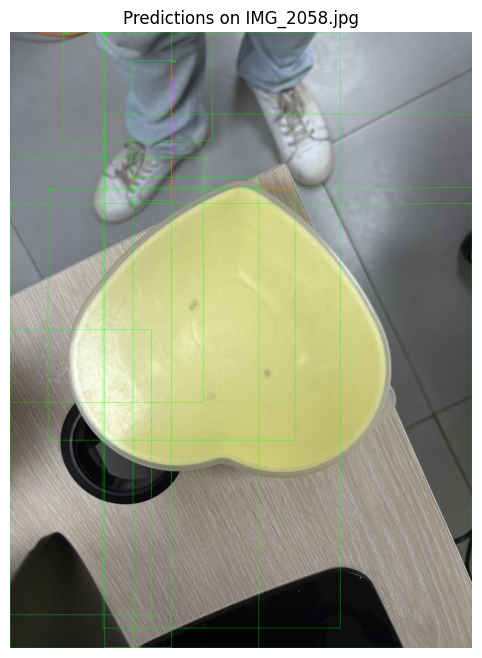

In [ ]:
# ========== inference / visualize on a random val image ==========
def decode_predictions(pred, conf_thresh=0.3):
    # pred: (S,S,C+5B) single image tensor cpu
    pred = pred.cpu().numpy()
    boxes = []
    for i in range(S):
        for j in range(S):
            cell = pred[i,j]
            # class score ignored (single class)
            for b in range(B):
                offset = C + b*5
                conf = cell[offset + 0]
                if conf < conf_thresh: continue
                rel_x = cell[offset+1]
                rel_y = cell[offset+2]
                bw = cell[offset+3]
                bh = cell[offset+4]
                # convert to absolute normalized coords
                cx = (j + rel_x) / S
                cy = (i + rel_y) / S
                boxes.append([conf, cx, cy, bw, bh])
    # optional: NMS (simple)
    if len(boxes)==0: return []
    # convert to xyxy normalized
    out = []
    for conf,cx,cy,bw,bh in boxes:
        x1 = cx - bw/2; y1 = cy - bh/2; x2 = cx + bw/2; y2 = cy + bh/2
        out.append([conf, x1, y1, x2, y2])
    # simple NMS by IoU
    out = sorted(out, key=lambda x: x[0], reverse=True)
    keep = []
    def iou(a,b):
        x1 = max(a[1], b[1]); y1 = max(a[2], b[2])
        x2 = min(a[3], b[3]); y2 = min(a[4], b[4])
        if x2<=x1 or y2<=y1: return 0.0
        inter = (x2-x1)*(y2-y1)
        area1 = (a[3]-a[1])*(a[4]-a[2]); area2 = (b[3]-b[1])*(b[4]-b[2])
        return inter / (area1 + area2 - inter + 1e-9)
    for box in out:
        skip=False
        for k in keep:
            if iou(box, k) > 0.4:
                skip=True; break
        if not skip: keep.append(box)
    return keep

# load best
model.load_state_dict(torch.load("/content/best_yolov1.pth", map_location=device))
model.eval()

# pick random val image
imgs = sorted(glob.glob(os.path.join(split_dir, "val", "images", "*.*")))
randp = random.choice(imgs)
img = cv2.imread(randp)
h0,w0 = img.shape[:2]
img_resized = cv2.resize(img, (img_size, img_size))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
tensor = torch.tensor(np.transpose(img_rgb,(2,0,1))[None], dtype=torch.float32).to(device)
with torch.no_grad():
    pred = model(tensor)[0]   # (S,S,C+5B)
decoded = decode_predictions(pred, conf_thresh=0.25)

# draw
vis = img.copy()
for conf,x1,y1,x2,y2 in decoded:
    # convert norm to original image coords
    # scale back from normalized to original W,H
    X1 = int(max(0, x1 * w0))
    Y1 = int(max(0, y1 * h0))
    X2 = int(min(w0, x2 * w0))
    Y2 = int(min(h0, y2 * h0))
    cv2.rectangle(vis, (X1,Y1), (X2,Y2), (0,255,0), 2)
    cv2.putText(vis, f"{conf:.2f}", (X1, max(15,Y1+15)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0),2)

# show
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions on {os.path.basename(randp)}")
plt.axis('off')
plt.show()
